In [24]:
!pip install easyocr

In [25]:
import easyocr
import cv2
import imutils
import numpy as np , pandas as pd
from matplotlib import pyplot as plt
import os



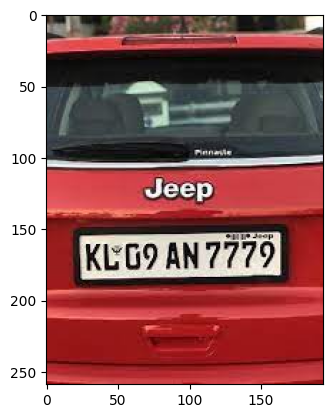

In [26]:
image_path = os.path.join('/content/images (3).jpg')
image = cv2.imread(image_path)
grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

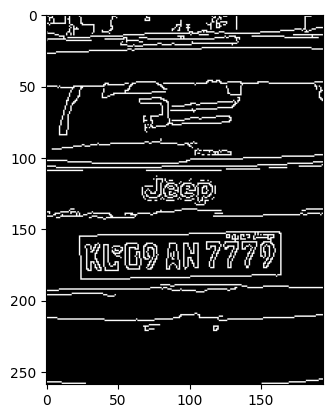

In [27]:
#noise and edge detection
noise_f = cv2.bilateralFilter(grey, 11, 17 ,17)

edged = cv2.Canny(noise_f,30,200)

plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))



In [28]:
imp_contours = cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

contours = imutils.grab_contours(imp_contours)
contours = sorted(contours,key=cv2.contourArea,reverse=True)[:10]

In [29]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break


In [30]:
location

array([[[164, 153]],

       [[ 23, 155]],

       [[ 24, 185]],

       [[161, 183]]], dtype=int32)

In [31]:
mask = np.zeros(grey.shape,np.uint8)
new_image = cv2.drawContours(mask,[location],0,255,-1)
new_image = cv2.bitwise_and(image,image,mask=mask)

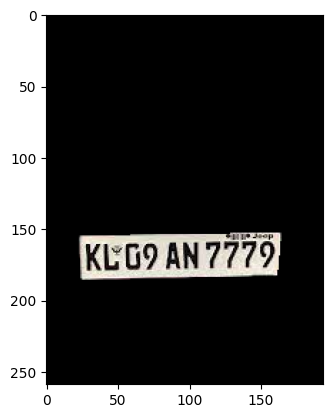

In [32]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

In [33]:
#cropping the masked image
(x,y)= np.where(mask==255)
(x1,y1)= (np.min(x),np.min(y))
(x2,y2)= (np.max(x),np.max(y))
cropped = grey[x1:x2+1,y1:y2+1]

In [34]:
#weiner filter to sharpen
from scipy.signal import wiener
x = wiener(new_image)
x = np.clip(new_image,0,255)
x = x.astype(np.uint8)


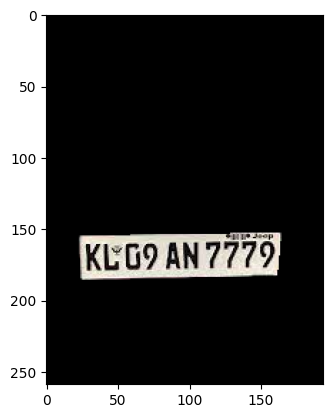

In [35]:
plt.imshow(cv2.cvtColor(x,cv2.COLOR_BGR2RGB))

In [37]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = grey[x1:x2+1, y1:y2+1]

In [39]:
#text reading

reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[0, 0], [142, 0], [142, 33], [0, 33]], 'KL 02 AN7772', 0.19960262258884667)]

In [40]:
text = result[0][-2]
print(text)

KL 02 AN7772
